## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd
import numpy as np

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'

client_info_types = {
    'status': str,
    'duration': np.int32,
    'credit_history': str,
    'purpose': str,
    'amount': np.int32,
    'savings': str,
    'employment_duration': str,
    'installment_rate': str,
    'personal_status_sex': str,
    'other_debtors': str,
    'present_residence': str,
    'property': str,
    'age': np.int32,
    'other_installment_plans': str,
    'housing': str,
    'number_credits': str,
    'job': str,
    'people_liable': str,
    'telephone': str,
    'foreign_worker': str,
    'credit_risk': str
}

data = pd.read_csv(
    url,
    sep=',',
    index_col=False,
    dtype=client_info_types
)

print(data.shape)
pd.concat(objs=[data.head(), data.tail()])

(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
if (data.isna().sum().all() == 0):
    print('No missing values')
else:
    print('Some missing values detected')
data.isna().sum()

No missing values


status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [7]:
serial_data = data.loc[:, data.columns.isin(
    ['savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits', 'people_liable']
)]

categorical_data = data.loc[:, data.columns.isin(
    ['status', 'credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job']
)]

binary_data = pd.DataFrame(None)

for column_index in data:
    unique_values = data[column_index].nunique()

    if unique_values == 2:
        if binary_data.empty:
            binary_data = data[column_index]
        else:
            binary_data = pd.concat(
                objs=[binary_data, data[column_index]],
                axis=1
            )

quantative_data = data._get_numeric_data()
quantative_data = quantative_data.loc[:, ~quantative_data.columns.isin(
    np.append(binary_data.columns.values, serial_data.columns.values)
)]

print("Quantative data:")
print(quantative_data)

print("Binary data:")
print(binary_data)

print("Serial data:")
print(serial_data)

print("Categorical data:")
print(categorical_data)

Quantative data:
     duration  amount  age
0          18    1049   21
1           9    2799   36
2          12     841   23
3          12    2122   39
4          12    2171   38
..        ...     ...  ...
995        24    1987   21
996        24    2303   45
997        21   12680   30
998        12    6468   52
999        30    6350   31

[1000 rows x 3 columns]
Binary data:
    people_liable                  telephone foreign_worker credit_risk
0          0 to 2                         no             no        good
1       3 or more                         no             no        good
2          0 to 2                         no             no        good
3       3 or more                         no            yes        good
4          0 to 2                         no            yes        good
..            ...                        ...            ...         ...
995     3 or more                         no             no         bad
996        0 to 2                         no 

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
young_and_not_rich = data.loc[(data['age'] < 30) & (data['housing'] == 'rent')]
not_young_and_not_rich = data.loc[(data['age'] > 40) & (data['housing'] == 'rent')]

print(f'Clients under 30 years of age who rent housing: {len(young_and_not_rich.index)/len(data.index)}')
print(f'Clients over 40 years of age who rent housing: {len(not_young_and_not_rich.index)/len(data.index)}')

Clients under 30 years of age who rent housing: 0.246
Clients over 40 years of age who rent housing: 0.185


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [10]:
data.loc[
    (data['foreign_worker'] == 'yes') &
    ((data['number_credits'] != '1') | (data['number_credits'] != '2-3'))
].shape[0]

37

### Задание 6 (1 балл)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

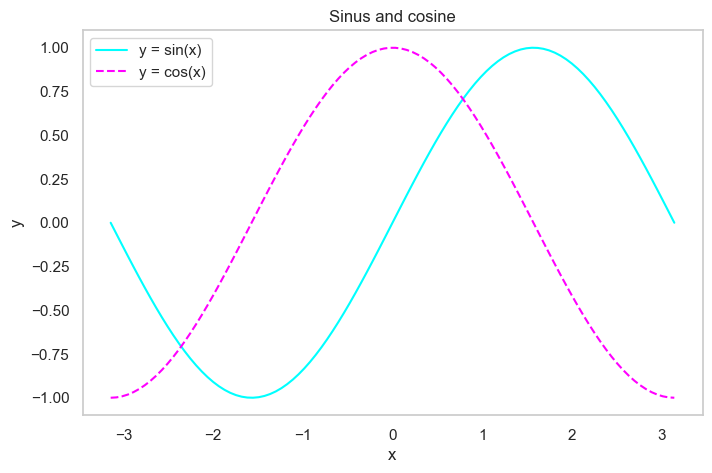

In [164]:
from math import sin, cos, pi

plt.rcParams['figure.figsize'] = 8, 5

x = np.linspace(-pi, pi, 100)
f1 = np.sin(x)
f2 = np.cos(x)

plot = plt.figure()
ax = plot.add_subplot(1, 1, 1)

plt.plot(x, f1, color='cyan', label='y = sin(x)')
plt.plot(x, f2, color='magenta', linestyle='dashed', label='y = cos(x)')
plt.legend(loc='upper left', )
plt.title('Sinus and cosine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Можем сделать вывод, что функции периодические, разница периодов $\pi$/2

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

C:\Users\user\AppData\Local\Temp\ipykernel_21828\1825280394.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot.show();


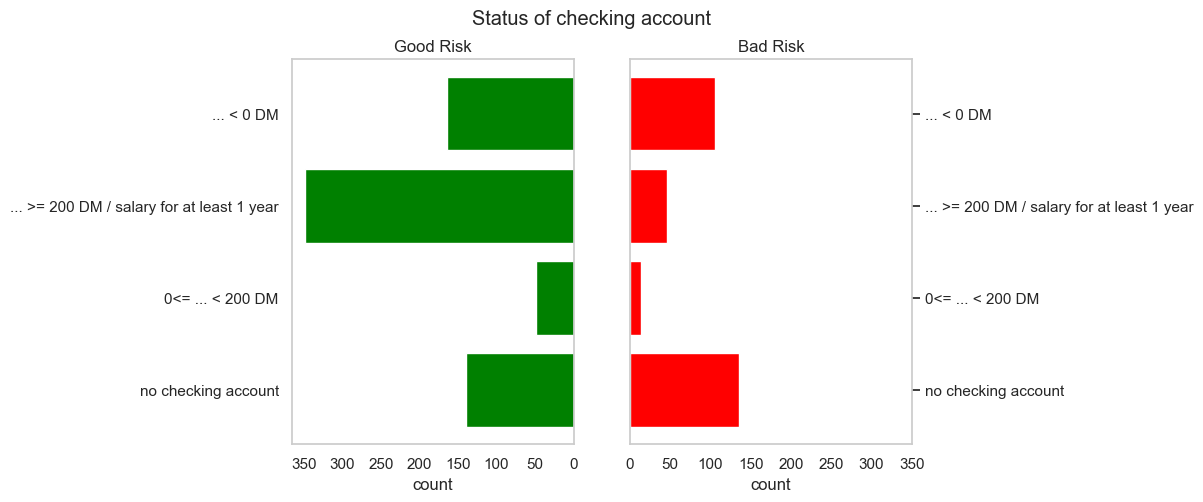

In [173]:
positive_cases = data.loc[data['credit_risk'] == 'good'].groupby('status')['status'].count()
negative_cases = data.loc[data['credit_risk'] == 'bad'].groupby('status')['status'].count()

plot = plt.figure()
plot.suptitle('Status of checking account')

ax = plot.add_subplot(1, 2, 1)
ax.barh(positive_cases.index, positive_cases.values, color='green')
ax.set_title('Good Risk')
ax.invert_yaxis()
ax.invert_xaxis()
ax.set_xticks(np.linspace(0, 350, 8))
ax.xaxis.set_label_text('count')
ax.grid(False)

ax1 = plot.add_subplot(1, 2, 2)
ax1.barh(negative_cases.index, negative_cases.values, color='red')
ax1.set_title('Bad Risk')
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, 350, 8))
ax1.grid(False)
ax1.yaxis.set_ticks_position('right')
ax1.xaxis.set_label_text('count')

plot.show()

Можем сделать вывод, что люди с большой зарплатой имеют меньший риск не вернуть кредит, чем люди с маленькой зарплатой

### Задание 8  (0.5 балла)

In [149]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

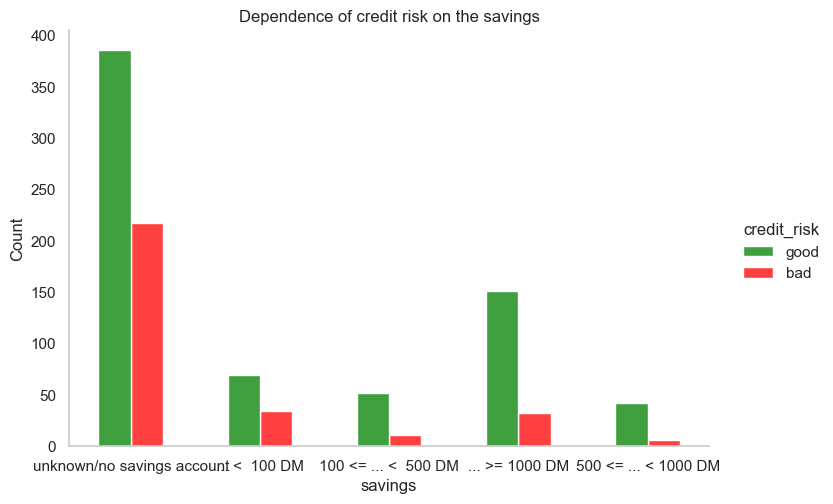

In [171]:
sns.set_style("whitegrid", {'axes.grid': False})
sns.displot(
    data,
    x = 'savings',
    hue='credit_risk',
    multiple='dodge',
    palette=['green', 'red'],
    aspect=1.5,
    shrink=0.5
).set(
    title = 'Dependence of credit risk on the savings'
);

# ну раз уж вы спросили, что нравится... Вообще очевидно тут аксиома эскобара, обе либы ужасны, как и сам питон в принципе:
# ужасный тулинг, которого тупо нет (дай бог покажет функции, которые есть у класса, на аргументы функций и надеяться не стоит),
# ужасный неинтуитивный синтаксис (скопированный с матлаба) и документация у обоих либ, которая описывает далеко не всё:
# multiple='dodge' не было в документации, только в одном примере, и то там был 'stacked', пришлось лезть в кишки класса, чтобы увидеть все возможные значения.
# shrink тоже не было в документации, я сгорел изнутри, пока нашёл это на 101 сайте

# А так, seaborn поприятнее конечно, да.
# Надеюсь, в прекрасном мл и дл будущего люди перейдут на котлин (либы уже существуют, кстати) и больше не будут знать, что такое питон. Извиняюсь, я сгорел...

Можем сделать вывод, что размер сберегательного счёта не очень сильно влияет на риск выдачи кредита человека: в каждой категории количество людей с хорошим риском как минимум в 2 раза превышает количество людей с плохим риском

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

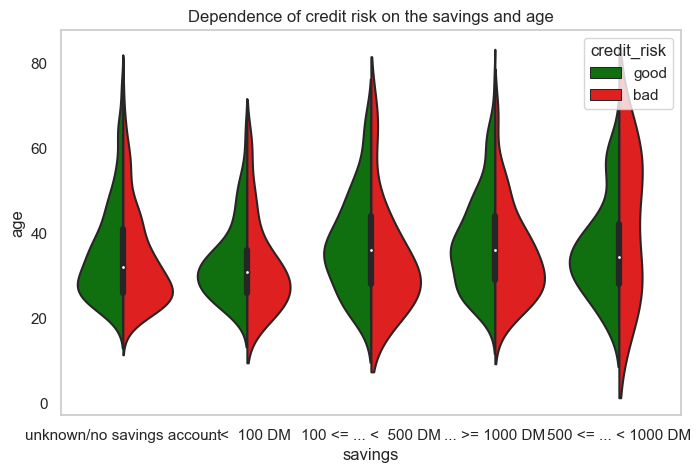

In [169]:
sns.set_style("whitegrid", {'axes.grid': False})
sns.violinplot(
    data,
    x = 'savings',
    y = 'age',
    hue='credit_risk',
    palette=['green', 'red'],
    aspect=3,
    split=True,
).set(
    title='Dependence of credit risk on the savings and age'
);

Можем сделать вывод, что возраст практически не влияет на риск выдачи кредитов для первых четырех категорий накопительного счета на графике: распределения очень похожи друг на друга. При этом вероятности хорошего и плохого риска практически одинаковы для всех возрастов для этих категорий. Также в категории накопительного счёта выше среднего (500 <= ... < 1000) количество людей с хорошим риском выше, чем с плохим, только в возрастном промежутке от примерно 25 до 35 лет.

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

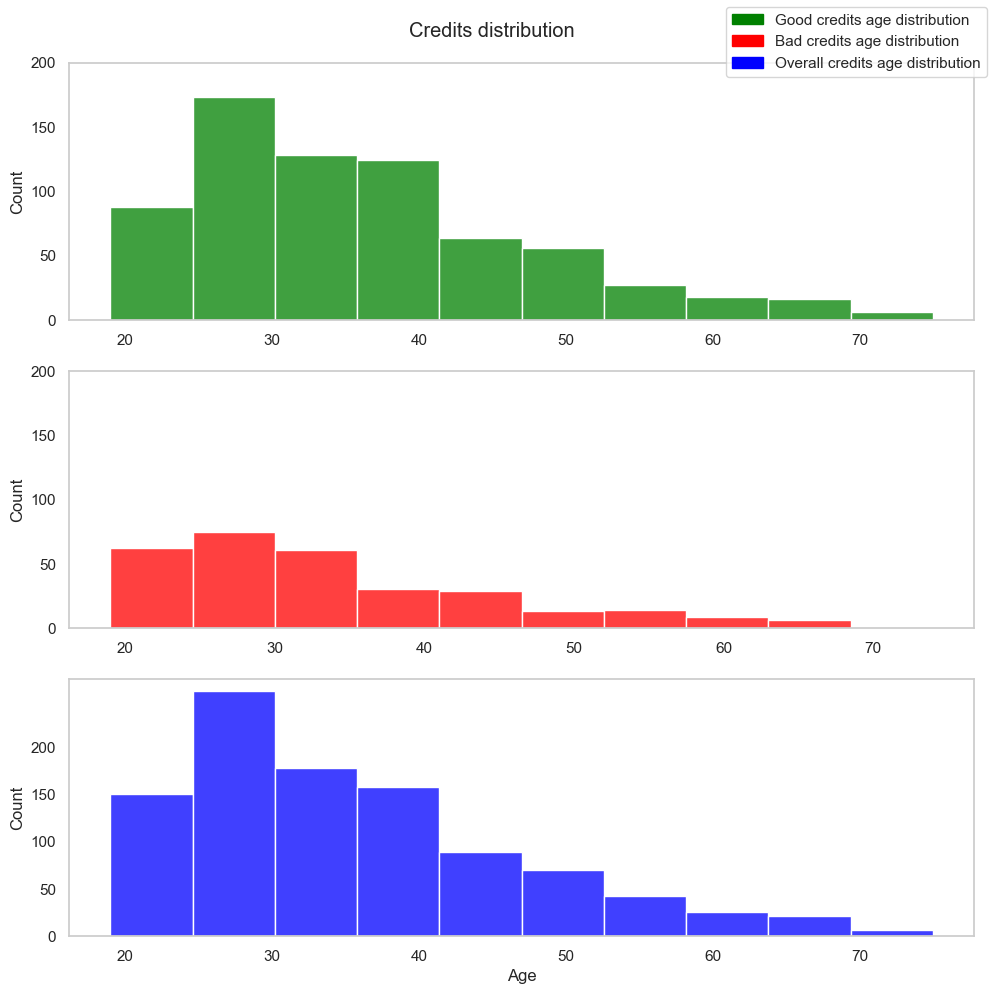

In [270]:
import matplotlib.patches as mpatches

figure, axis = plt.subplots(3, 1, figsize=(10,10))
figure.suptitle('Credits distribution')
sns.set_style("whitegrid", {'axes.grid': False})

plot1 = sns.histplot(
    data=data.loc[data['credit_risk'] == 'good'],
    x='age',
    color='green',
    ax=axis[0],
    bins=10
)
plot1.set_yticks([0, 50, 100, 150, 200])
plot1.set_xlabel('')

plot2 = sns.histplot(
    data=data.loc[data['credit_risk'] == 'bad'],
    x='age',
    color='red',
    ax=axis[1],
    bins=10
)
plot2.set_yticks([0, 50, 100, 150, 200])
plot2.set_xlabel('')

plot3 = sns.histplot(
    data=data,
    x='age',
    color='blue',
    ax=axis[2],
    bins=10
)
plot3.set_yticks([0, 50, 100, 150, 200])
plot3.set_xlabel('Age')

patch1 = mpatches.Patch(color='green', label='Good credits age distribution')
patch2 = mpatches.Patch(color='red', label='Bad credits age distribution')
patch3 = mpatches.Patch(color='blue', label='Overall credits age distribution')

figure.legend(handles=[patch1, patch2, patch3])
figure.tight_layout()
plt.show()

В целом, можно сделать вывод, что независимо от возраста у преобладающего количества людей кредитные риски хорошие. Еще можно заметить, что, чаще всего кредиты берут люди в возрасте от 25 до 30 лет.

    ### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Scattering of credit duration and amount')

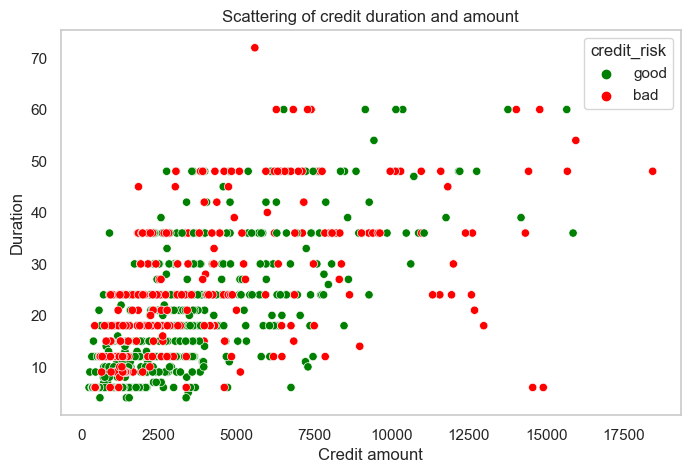

In [272]:
plot = sns.scatterplot(
    data=data,
    x='amount',
    y='duration',
    hue='credit_risk',
    palette=['green', 'red']
)
plot.set_xlabel('Credit amount')
plot.set_ylabel('Duration')
plot.set_title('Scattering of credit duration and amount')

Можно сделать вывод, что бОльшая часть людей берёт небольшие кредиты на небольшой промежуток времени, не желая обременять себя кредитной кабалой.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

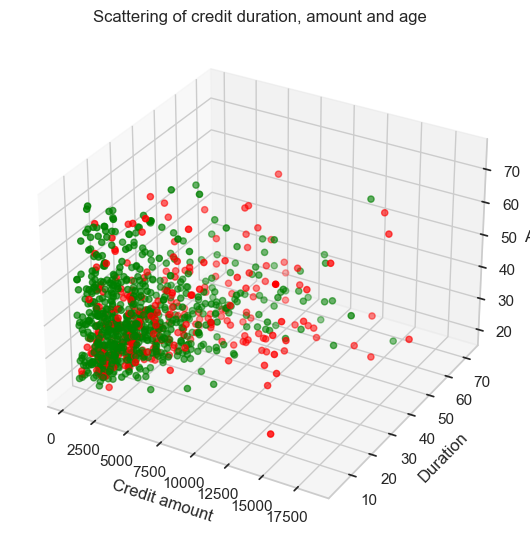

In [285]:
from mpl_toolkits.mplot3d import Axes3D

x = data['amount']
y = data['duration']
z = data['age']

figure = plt.figure(figsize=(5, 5))
axes = Axes3D(figure, auto_add_to_figure=False)
figure.add_axes(axes)

axes.scatter3D(
    x, y, z,
    c=data['credit_risk'].map(
        {'good': 'green', 'bad': 'red'}
    )
)
axes.set_xlabel('Credit amount')
axes.set_ylabel('Duration')
axes.set_zlabel('Age')
axes.set_title('Scattering of credit duration, amount and age');

Даже не знаю, что здесь можно сказать...

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [17]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))